<a href="https://colab.research.google.com/github/m-fila/uczenie-maszynowe-2021-22/blob/main/02_Regresja_liniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresja liniowa
Autor: Jarosław Żygierewicz, Artur Kalinowski, Mateusz Fila

Importujemy ponownie powtórzone `numpy`, dodajemy moduł do tworzenia wykresów `pyplot`.

In [8]:
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt

# Zapoznanie z regresją liniową
* W ramach tego ćwiczenia będziemy chcieli opisać zbiór danych modelem liniowym.
* Zbiór danych stworzymy sami w sposób sztuczny, ale w typowych problemach zebranie i obróbka danych stanowi znaczącą część pracy.
* Nasz liniowy model ma postać: $y = \theta_0 + \theta_1 x$
* Dane wytworzymy dla konkretnych $\theta_0$ i $\theta_1$, a następnie zaimplementujemy regresję liniową, aby znaleźć jak najlepsze przybliżenie dla tych parametrów.
* `(X,Y)` to ciąg uczący

## Produkcja danych

Dane wytworzymy według liniowej zależności 
$$
y = \theta_0 + \theta_1 \cdot x
$$
Ustalamy parametry dla symulacji na $\theta_0 = 5$ i $\theta_1 = 3$. Dla wygody włóżmy oba parametry do wektora (np.array):
$$
\vec{\theta} = (\theta_{0}, \theta_{1})
$$

In [4]:
theta0 = 5
theta1 = 3
theta = np.array([theta0, theta1])

Użyjemy **nPoints** równoodległych punktów $x$ i dla nich wygenerujemy punkty wg. założonego modelu. Dla wygody dane załadujemy do obiektu `DataFrame`. By to zrobić musimy zmienić wektor na kolumnowy o kształcie $(-1,1)$. Użyjemy do tego użyciu funkcji `reshape()` (ta zamiana także przyda się w dalszej części ćwiczeń).

In [5]:
nPoints = 100
x = np.linspace(0, 10, nPoints)
x = np.reshape(x, (-1,1))

df = pd.DataFrame(data=x, columns = ["x"])
df["y"] = theta[0] + df["x"]*theta[1]

Do danych "czystych" dodajmy kolumnę z danymi z szumem Gaussowskim:
$$ y_{noise} = y + Rand(N(0,1)) $$

In [6]:
df["y"] = theta0 + df["x"]*theta1
df["y_noise"] = df["y"] + np.random.randn(nPoints)
print(df)

           x          y    y_noise
0    0.00000   5.000000   3.432689
1    0.10101   5.303030   3.837029
2    0.20202   5.606061   6.401906
3    0.30303   5.909091   5.098037
4    0.40404   6.212121   6.339567
..       ...        ...        ...
95   9.59596  33.787879  33.528903
96   9.69697  34.090909  35.094582
97   9.79798  34.393939  33.618642
98   9.89899  34.696970  34.595930
99  10.00000  35.000000  33.287762

[100 rows x 3 columns]


Obejrzyjmy te dane. Proszę narysować:
<ul>
    <li> na jednym rysunku: y vs x oraz y_noise vs x </li>
    <li> na drugim rysunku: histogram y - y_noise
</ul>    

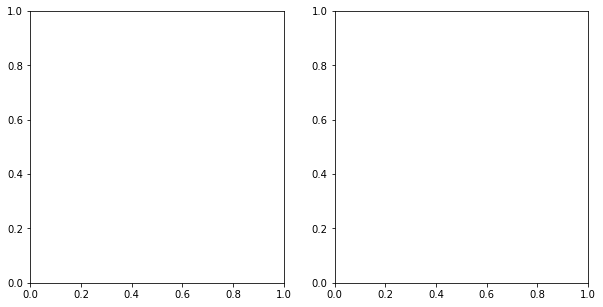

In [9]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

#YOUR CODE HERE

## Algorytm równań normalnych
Proszę napisać funkcję ```normal_equations(x,y)``` która:
* na wejściu przyjmuje ciąg uczący $x,y$, implementuje wzór na parametry optymalne na podstawie [równań normalnych](http://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wykład_1#Minimalizacja_funkcji_kosztu ). 
* funkcja powinna zwracać estymowane parametry $(\theta_{0}^{est}, \theta_{1}^{est})$
* funkcja p[owinna być przetestowana na czystych danych, czli parze $(x,y)$, a potem na danych zaszumionych $(x ,y_{noise}$)
* proszę dorysować prostą reprezentującą hipotezę do wykresu punktów ciągu uczącego.
* dla przypomnienia: odwrotność macierzy można obliczyć w numpy funkcją: <tt>numpy.linalg.inv</tt>
* proszę zwrócić uwagę, że konieczne jest użycie wektorów kolumnowych!

**Wskazówka:** aby skorzystać ze wzorów z wykładu, macierz wejść $X$ musi zawierać nie tylko kolumnę $x$, ale także kolumnę jedynek, aby przemnożona przez wektor [$\theta_0$ $\theta_1$] dawała odpowiedni wektor (kolumnowy) wyjść $y$.

In [12]:
def normal_equations(x,y):
    # YOUR CODE HERE
    # theta = 
    return theta

theta_est = normal_equations(df["x"], df["y"])

print("prawdziwe wartości parametrów:", theta.T)
print("wartości estymowane za pomocą równań normalnych dla nominalnych danych:", theta_est.T)

prawdziwe wartości parametrów: [5 3]
wartości estymowane za pomocą równań normalnych dla nominalnych danych: [5 3]


Korzystając z oszacowanych parametrów prostej proszę narysować:
* punkty dla danych zaszumionych
* linię prostą dopasowaną do danych szasumionych
* linię prostą dla nominalnych parametrów
* linię prostą dopasowaną do losowego ułamka próbki, wybranego z użyciem funkcji pandas.DataFrame.sample()

In [ ]:
theta_est = normal_equations(df["x"], df["y_noise"])
print("Wartości estymowane za pomocą równań normalnych dla zaszumionych danych:", theta_est.T)

# YOUR CODE HERE
# y_fit = 
# y_original = 


fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].plot(df["x"], df["y_noise"], 'ro', label = "data")
axes[0].plot(df["x"], y_fit, 'b', linewidth=3.0, label = "fitted line")
axes[0].plot(df["x"], y_original, 'g', linewidth=3.0, label="orignal line")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()

df_subsample = df.sample(frac=0.05)
theta_est = normal_equations(df_subsample["x"], df_subsample["y_noise"])
print("Wartości estymowane za pomocą równań normalnych dla zaszumionych danych: {} \ndla podpróbki obejmującej 5% przypadków.".format(theta_est.T))

# YOUR CODE HERE
# y_fit = 
# axes[1].plot(

axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].legend()

## Algorytm gradientowy stochastyczny 

Proszę napisać funkcję ```iterative_stochastic_gradient(x,y, theta, alpha, nIter)``` która:
* na wejściu przyjmuje ciąg uczący w postaci obiektu pandas.DataFrame, wartości początkowe $(\theta_{0}, \theta_{1})$, parametr szybkości zbiegania $\alpha$ oraz liczbę iteracji nIter
* implementuje wzór na parametry optymalne na podstawie [równań normalnych](http://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wykład_1#Minimalizacja_funkcji_kosztu ). 
* funkcja powinna zwracać estymowane parametry $(\theta_{0}^{est}, \theta_{1}^{est})$ dla wszystkich iteracji, czyli zwracać tablicę o kształcie
 $(nIter+1, 2)$. Początkową wartość $(\theta_{0}^{est}, \theta_{1}^{est})$ także należy dołączyc, stąd nIter+1 elementów
* funkcja powinna być przetestowana na czystych danych, czyli parze $(x,y)$ z poczatkową wartością $(\theta_{0}, \theta_{1})$$(\theta_{0}, \theta_{1})$ równą nominalnej, oraz różnej od nominalnej

In [14]:
%%time

def iterative_stochastic_gradient(x, y, init_theta, alpha, nIter):
    
    # YOUR CODE HERE
    # theta_est = 
    return theta_est   
        
          
theta_est = iterative_stochastic_gradient(df["x"], df["y"], theta, 0.01, 1)    
print("Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta:",theta_est[-1])

theta_est = iterative_stochastic_gradient(df["x"], df["y"], theta+2, 0.01, 500)    
print("Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta:",theta_est[-1])

Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta: 3
Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta: 3
CPU times: user 1.63 ms, sys: 181 µs, total: 1.81 ms
Wall time: 1.2 ms


Proszę narysować następujące rysunki:
* dane, oraz krzywe regressji dla wszyskich iteracji na jednym rysunku
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.1, 0.05 oraz 0.01 oraz 10 iteracji
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 dla 100 iteracji

W każdym przypadku jako wartości początkowe proszę przyjąć ($\theta_{0}$, $\theta_{1}$) + 1

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(20,5))

# YOUR CODE HERE
# theta_est = 
# x = 
# y_fit = 

# YOUR CODE HERE
# axes[0].plot(
# axes[0].plot(
# axes[0].plot(
# axes[0].plot(
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()

# YOUR CODE HERE
# theta_alpha_01 = 
# theta_alpha_005 = 
# theta_alpha_001 = 
# theta_alpha = 

# YOUR CODE HERE
# axes[1].plot(
# axes[1].plot(
# axes[1].plot(
axes[1].set_xlabel("Iteration number")
axes[1].set_ylabel(r'$\theta_{0}$')
axes[1].legend()

# YOUR CODE HERE
# axes[2].plot(
# axes[2].plot(
# axes[2].plot(
axes[2].set_xlabel("Iteration number")
axes[2].set_ylabel(r'$\theta_{1}$')
axes[2].legend()

# YOUR CODE HERE
# axes[3].plot(
# axes[3].plot(
# axes[3].plot(
# axes[3].plot(
axes[3].set_xlabel("Iteration number")
axes[3].set_ylabel(r'$\theta_{i}$')
axes[3].legend()

print("Finalna wartość parametrów dla alpha=0.1, nIter = 10: \t\t",theta_alpha_01[-1])
print("Finalna wartość parametrów dla alpha=0.05, nIter = 10: \t\t",theta_alpha_005[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 10: \t",theta_alpha_001[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 100: \t",theta_alpha[-1])
print("Oryginalna wartośc parametrów: \t\t\t\t",theta)

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

## Algorytm gradientowy zbiorczy

Proszę napisać funkcję ```iterative_batch_gradient(x,y, theta, alpha, nIter)``` która:
* na wejściu przyjmuje ciąg uczący w postaci obiektu pandas.DataFrame, wartości początkowe $(\theta_{0}, \theta_{1})$, parametr szybkości zbiegania $\alpha$ oraz liczbę iteracji nIter
* implementuje wzór na parametry optymalne na podstawie [równań normalnych](http://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wykład_1#Minimalizacja_funkcji_kosztu ). 
* funkcja powinna zwracać estymowane parametry $(\theta_{0}^{est}, \theta_{1}^{est})$ dla wszystkich iteracji, czyli zwracać tablicę o kształcie
 $(nIter+1, 2)$. Początkową wartość $(\theta_{0}^{est}, \theta_{1}^{est})$ także należy dołączyc, stąd nIter+1 elementów
* funkcja powinna być przetestowana na czystych danych, czyli parze $(x,y)$ z poczatkową wartością $(\theta_{0}, \theta_{1})$ równą nominalnej, oraz różnej od nominalnej

In [10]:
%%time

def iterative_batch_gradient(x, y, init_theta, alpha, nIter):
    
    # YOUR CODE HERE
    # theta_est = 
    return theta_est   
        
theta_est = iterative_batch_gradient(df["x"], df["y"], init_theta=theta, alpha=0.01, nIter=1)    
print("Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta:",theta_est[-1])

theta_est = iterative_batch_gradient(df["x"], df["y"], init_theta=theta+1, alpha=0.01, nIter=1)    
print("Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta:",theta_est[-1])

Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta: [5. 3.]
Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta: [5.88       3.22996633]
CPU times: user 23.5 ms, sys: 3.61 ms, total: 27.2 ms
Wall time: 26.3 ms


Proszę narysować następujące rysunki:
* dane, oraz krzywe regressji dla wszyskich iteracji na jednym rysunku
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.1, 0.05 oraz 0.01 oraz 10 iteracji
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 dla 100 iteracji

W każdym przypadku jako wartości początkowe proszę przyjąć ($\theta_{0}$, $\theta_{1}$) + 1

Finalna wartość parametrów dla alpha=0.1, nIter = 10: 		 [ 7919967.67485164 52673270.04109411]
Finalna wartość parametrów dla alpha=0.05, nIter = 10: 		 [1192.52928675 7896.14592296]
Finalna wartość parametrów dla alpha=0.001, nIter = 10: 	 [5.80259903 2.88358954]
Finalna wartość parametrów dla alpha=0.001, nIter = 100: 	 [5.59822474 2.9143083 ]
Oryginalna wartośc parametrów: 				 [5 3]


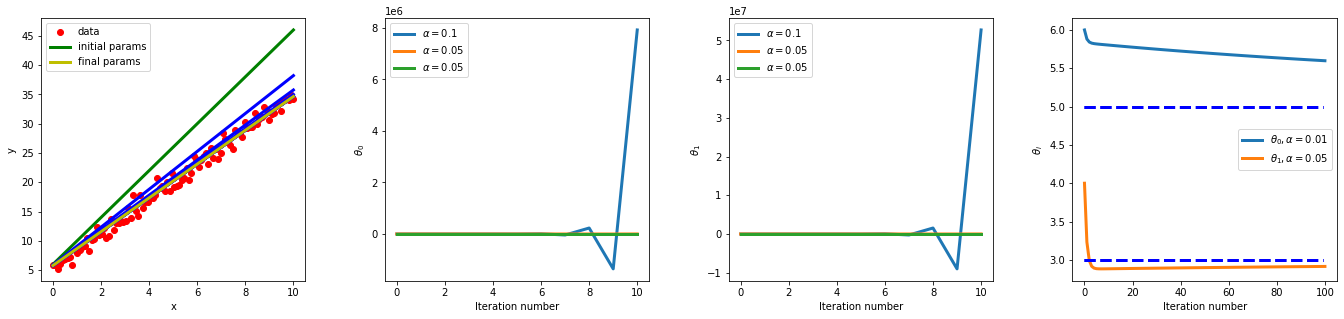

In [11]:
fig, axes = plt.subplots(1,4, figsize=(20,5))

# YOUR CODE HERE
# theta_est = 
# x = 
# y_fit = 

# YOUR CODE HERE
# axes[0].plot(
# axes[0].plot(
# axes[0].plot(
# axes[0].plot(
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()

# YOUR CODE HERE
# theta_alpha_01 = 
# theta_alpha_005 = 
# theta_alpha_001 = 
# theta_alpha = 

# YOUR CODE HERE
# axes[1].plot(
# axes[1].plot(
# axes[1].plot(
axes[1].set_xlabel("Iteration number")
axes[1].set_ylabel(r'$\theta_{0}$')
axes[1].legend()

# YOUR CODE HERE
# axes[2].plot(
# axes[2].plot(
# axes[2].plot(
axes[2].set_xlabel("Iteration number")
axes[2].set_ylabel(r'$\theta_{1}$')
axes[2].legend()

# YOUR CODE HERE
# axes[3].plot(
# axes[3].plot(
# axes[3].plot(
# axes[3].plot(
axes[3].set_xlabel("Iteration number")
axes[3].set_ylabel(r'$\theta_{i}$')
axes[3].legend()

print("Finalna wartość parametrów dla alpha=0.1, nIter = 10: \t\t",theta_alpha_01[-1])
print("Finalna wartość parametrów dla alpha=0.05, nIter = 10: \t\t",theta_alpha_005[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 10: \t",theta_alpha_001[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 100: \t",theta_alpha[-1])
print("Oryginalna wartośc parametrów: \t\t\t\t",theta)

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

## Porównanie algorytmów
Proszę sprawdzić czy algorytmy optymalizacyjne działają poprawnie dla danych gdzie błąd podlega innym rozkładom prawdopodobieństwa niż normalny:

* dla rozkładu jednorodnego w zakrtesie [-1,1[
* dla rozkłatu t-Studenta o trzech stopniach swobody

Dla wszystkch trzech rozkładów proszę narysować wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 i 100 iteracji.

In [30]:
df["y_flat_noise"] = df["y"] + -1 + 2*np.random.random(nPoints)
df["y_tStudent_noise"] = df["y"] + np.random.standard_t(df=3, size=nPoints)
print(df)

           x          y    y_noise  y_flat_noise  y_tStudent_noise
0    0.00000   5.000000   5.816979      4.723023          6.126249
1    0.10101   5.303030   5.340698      4.643993         -2.343500
2    0.20202   5.606061   6.462301      4.805613          5.012846
3    0.30303   5.909091   5.322659      6.155243          5.692222
4    0.40404   6.212121   5.301430      6.513775          7.180299
..       ...        ...        ...           ...               ...
95   9.59596  33.787879  32.705299     33.530013         34.683707
96   9.69697  34.090909  33.273414     33.767999         31.609354
97   9.79798  34.393939  35.062783     33.432946         33.858484
98   9.89899  34.696970  33.137135     33.834136         34.457895
99  10.00000  35.000000  33.187367     34.899603         35.549503

[100 rows x 5 columns]


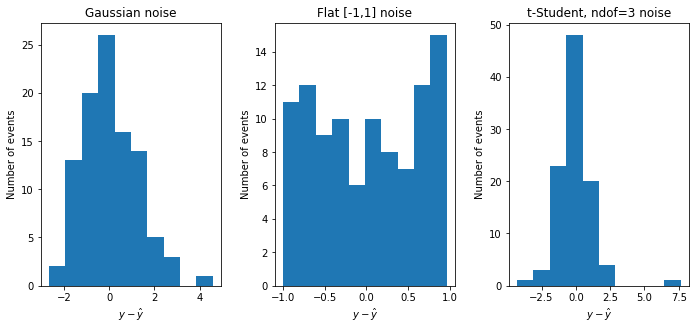

In [39]:
fig, axes = plt.subplots(1,3, figsize=(10,5))

axes[0].hist(df["y"] - df["y_noise"])
axes[1].hist(df["y"] - df["y_flat_noise"])
axes[2].hist(df["y"] - df["y_tStudent_noise"])

axes[0].set_title("Gaussian noise")
axes[0].set_xlabel(r'$y - \hat{y}$')
axes[0].set_ylabel("Number of events")

axes[1].set_title("Flat [-1,1] noise")
axes[1].set_xlabel(r'$y - \hat{y}$')
axes[1].set_ylabel("Number of events")

axes[2].set_title("t-Student, ndof=3 noise")
axes[2].set_xlabel(r'$y - \hat{y}$')
axes[2].set_ylabel("Number of events")

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

In [ ]:
%%time

fig, axes = plt.subplots(1,2, figsize=(10,5))

nIter = 1000

# YOUR CODE HERE 
# theta_gaussian_noise
# theta_flat_noise
# theta_tStudent_noise

# YOUR CODE HERE 
# axes[0].plot(
# axes[0].plot(
# # axes[0].plot(   
axes[0].plot(np.full(nIter,theta[0]),  "--b",linewidth=3.0)
axes[0].set_xlabel("Iteration number")
axes[0].set_ylabel(r'$\theta_{0}$')
axes[0].legend()

# YOUR CODE HERE 
# axes[1].plot(
# axes[1].plot(
# # axes[1].plot(   axes[1].plot(np.full(nIter,theta[1]), "--b",  linewidth=3.0)
axes[1].set_xlabel("Iteration number")
axes[1].set_ylabel(r'$\theta_{1}$')
axes[1].legend()

print("Finalna wartość parametrów dla szumu gaussowskiego, nIter = 100: \t",theta_gaussian_noise[-1])
print("Finalna wartość parametrów dla szumu płaskiego, nIter = 100: \t\t",theta_flat_noise[-1])
print("Finalna wartość parametrów dla szumu tStudenta, nIter = 100: \t\t",theta_tStudent_noise[-1])
print("Oryginalna wartośc parametrów: \t\t\t\t\t",theta)

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)